In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('solar_30min.csv')
df.head()

,Timestamp,NSW,VIC
0,1/01/2019 6:00,67.976011,7.157000
1,1/01/2019 6:30,136.687714,44.880295
2,1/01/2019 7:00,246.948967,142.759208
3,1/01/2019 7:30,330.441112,314.663779
4,1/01/2019 8:00,389.516663,384.268539


In [3]:
df.drop('VIC', axis= 1, inplace= True)

In [4]:
# Check Nulls
df.isnull().sum()

Timestamp    0
NSW          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13338 entries, 0 to 13337
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  13338 non-null  object 
 1   NSW        13338 non-null  float64
dtypes: float64(1), object(1)
memory usage: 208.5+ KB


In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13338 entries, 2019-01-01 06:00:00 to 2020-08-05 19:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NSW     13338 non-null  float64
dtypes: float64(1)
memory usage: 208.4 KB


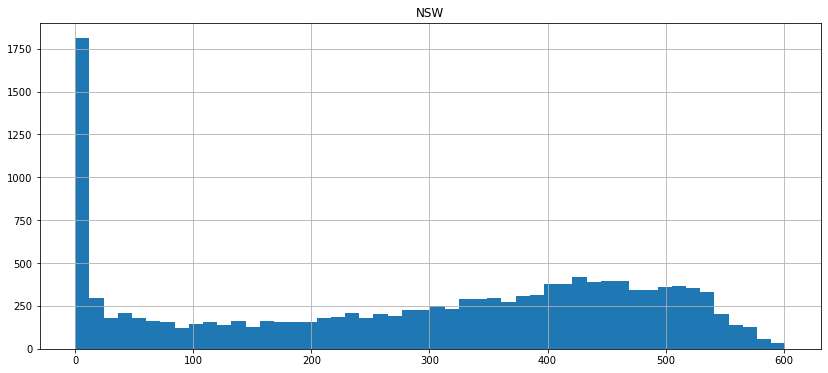

In [8]:
# Look at the distributions
df.hist(bins= 50, figsize=(14, 6))
plt.show()

In [9]:
# Lag feature
df['lag_1'] = df['NSW'].shift(1)
df = df.reindex(columns= ['NSW', 'lag_1'])
df.head()

,NSW,lag_1
Timestamp,,
2019-01-01 06:00:00,67.976011,NaN
2019-01-01 06:30:00,136.687714,67.976011
2019-01-01 07:00:00,246.948967,136.687714
2019-01-01 07:30:00,330.441112,246.948967
2019-01-01 08:00:00,389.516663,330.441112


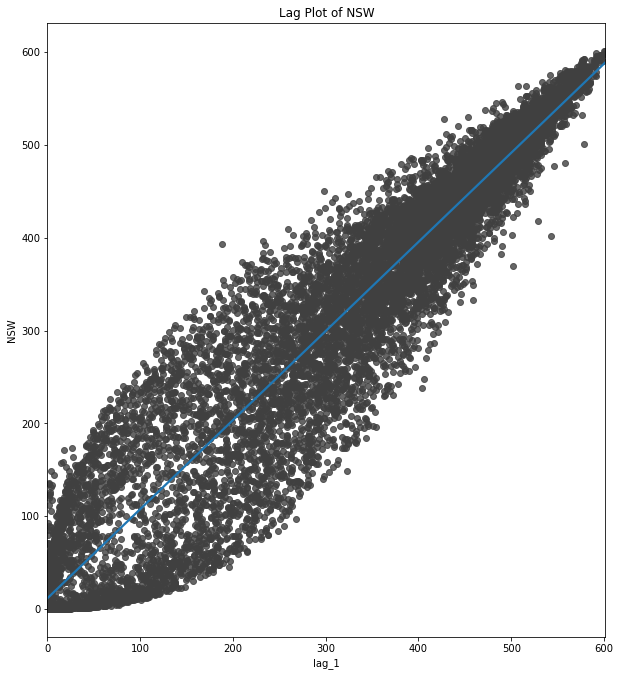

In [10]:
fig, ax = plt.subplots(figsize=(10,12))
ax = sns.regplot(x='lag_1', y='NSW', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of NSW');

In [11]:
df_ = df.copy()
df_['Time'] = np.arange(len(df.index))
df_.head()

,NSW,lag_1,Time
Timestamp,,,
2019-01-01 06:00:00,67.976011,NaN,0
2019-01-01 06:30:00,136.687714,67.976011,1
2019-01-01 07:00:00,246.948967,136.687714,2
2019-01-01 07:30:00,330.441112,246.948967,3
2019-01-01 08:00:00,389.516663,330.441112,4


In [12]:
# Training data 
X = df_.loc[:, ['Time']] # Features
y = df_.loc[:, 'NSW'] # target

In [13]:
# Split our dataset
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=.33, random_state=44)

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()

In [15]:
linearReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = linearReg.predict(X_test)

In [17]:
print('Intercept: ', linearReg.intercept_)
print('Slope: ', linearReg.coef_)

Intercept:  268.3363695431989
Slope:  [0.00315686]


In [18]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

184.49400483734095

In [19]:
lr_score = linearReg.score(X_test, y_test)

print('R-squared value:', lr_score)

R-squared value: 0.0033097140295507144


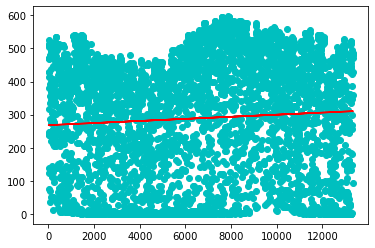

In [20]:
# Data scatter of predicted values
plt.scatter(X_test, y_test, color ='c')
plt.plot(X_test, y_pred, color ='r')
  
plt.show()

## Decision Tree Regression

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=44)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=44, splitter='best')

In [22]:
y_pred = tree_reg.predict(X_test)

In [23]:
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

59.074169672778034

In [24]:
score = tree_reg.score(X_test, y_test)

print('R-squared value:', score) # An R-square=1 indicates perfect fit

R-squared value: 0.8978141031103056


## RandomForest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=44)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=44, verbose=0, warm_start=False)

In [26]:
y_pred = forest_reg.predict(X_test)

In [27]:
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

45.63894541847156

In [28]:
score = forest_reg.score(X_test, y_test)

print('R-squared value:', score)

R-squared value: 0.9390088376324058


# :- Using Clustering for Preprocessing

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters= 10)),
    ('Forest_reg', RandomForestRegressor())
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('Forest_reg',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                    

In [42]:
pipeline.score(X_test, y_test)

0.9444842939159772

#### We can use GridSearchCV to find the optimal number of clusters:

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 20))
grid_ForReg = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_ForReg.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   1.6s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   1.5s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   1.6s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   2.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   2.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   2.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   2.5s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   2.7s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  5.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=10, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('Forest_reg',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,

In [44]:
grid_ForReg.best_params_

{'kmeans__n_clusters': 5}

In [45]:
grid_ForReg.score(X_test, y_test)

0.9448390993882688

# NICE :- RF-Reg the best.